## Understanding ANK probes responses

### Conduino measurements
Only ANK probes were connected.

#### Homogeneous water column Jul17

$\rho=1.007536$ at 20.001 $^{\circ}$C at 3:30 pm

#### Homogeneous water column Jul18 - experiments

$\rho=1.00934$ at 20.016 $^{\circ}$C at 9:55 am

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import scipy.io as sio
import sys
sys.path.append('/ocean/kramosmu/MultipleCanyons/lab/Conduino/scripts')
import conduino_tools as ctools
import profiler_tools as ptools

In [2]:
sns.set_style('whitegrid')
sns.set_context('notebook')

In [3]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [18]:
def plot_cases(filepaths,labels, strat=False, ini_dens=1.007536):
    fig, (ax0,ax1) = plt.subplots(2,1, figsize=(10,8), sharex=True)
    
    if strat==False:
        ax1.axhline(ini_dens, color='coral', label='density measurment')
    else:
        ax1.axhline(1.00904, color='coral')
        ax1.axhline(1.02602, color='coral', label='density measurment')
    
    sns.set_palette(sns.cubehelix_palette(len(filepaths), start=.5, rot=-.75))
    for filepath, lab in zip(filepaths, labels):
        mat = sio.loadmat(filepath, squeeze_me=True)
        P3 = mat['ch3']
        D3 = ctools.densP_12Jul19(P3)
        time = mat['time']
        ax0.plot(time,P3,'.-', label=lab)
        ax1.plot(time,D3,'.-', label=lab)

    ax0.legend(bbox_to_anchor=(1,1))
    ax1.legend(bbox_to_anchor=(1,1))

    ax0.set_ylabel('reading')
    ax1.set_ylabel('density / g cm$^{-3}$')
    ax0.set_title('P20')
    ax1.set_xlabel('time / s')
    plt.tight_layout()
    return ax0,ax1

Probes P20 profiler

|Channel|Probe|
|::|::|
|'ch3':|P20|


## Homogeneous watercolumn
### All measurements

Text(0.5,0,'time / s')

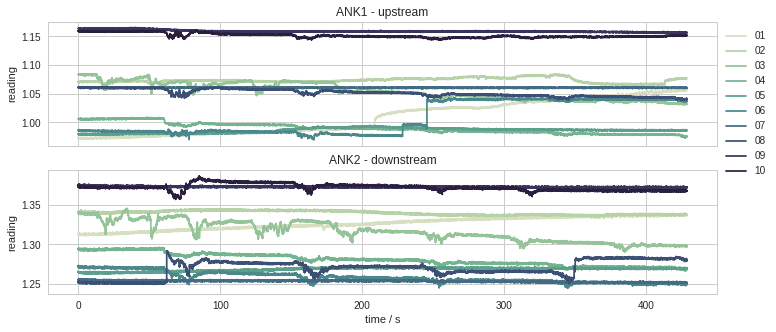

In [6]:
fig, (ax0,ax1) = plt.subplots(2,1, figsize=(12,5), sharex=True)

labels = ['01','02','03','04','05','06','07','08','09','10'] 
   
filepaths = ['../probe_characterization_17jul19/01_ANKs.mat',
             '../probe_characterization_17jul19/02_ANKs.mat',
             '../probe_characterization_17jul19/03_ANKs_slush.mat',
             '../probe_characterization_17jul19/04_ANKs_slush2.mat',
             '../probe_characterization_17jul19/05_ANKs3.mat',
             '../probe_characterization_17jul19/06_ANKs_slush3.mat',
             '../probe_characterization_17jul19/07_ANKs4.mat',
             '../probe_characterization_17jul19/08_ANKs_slush4.mat',
             '../probe_characterization_17jul19/09_ANKs5.mat',
             '../probe_characterization_17jul19/10_ANKs_slush5.mat',
            ]

sns.set_palette(sns.cubehelix_palette(len(filepaths), start=.5, rot=-.75))
for filepath, lab in zip(filepaths, labels):
    mat = sio.loadmat(filepath, squeeze_me=True)
    P1 = mat['ch1']
    P2 = mat['ch2']
    time = mat['time']
    ax0.plot(time,P1, label=lab)
    ax1.plot(time,P2, label=lab)
    
ax0.legend(bbox_to_anchor=(1,1))

ax0.set_ylabel('reading')#'density / g cm$^{-3}$')
ax1.set_ylabel('reading')#'density / g cm$^{-3}$')
ax0.set_title('ANK1 - upstream')
ax1.set_title('ANK2 - downstream')
ax1.set_xlabel('time / s')

### Base readings

(1.0025, 1.00755)

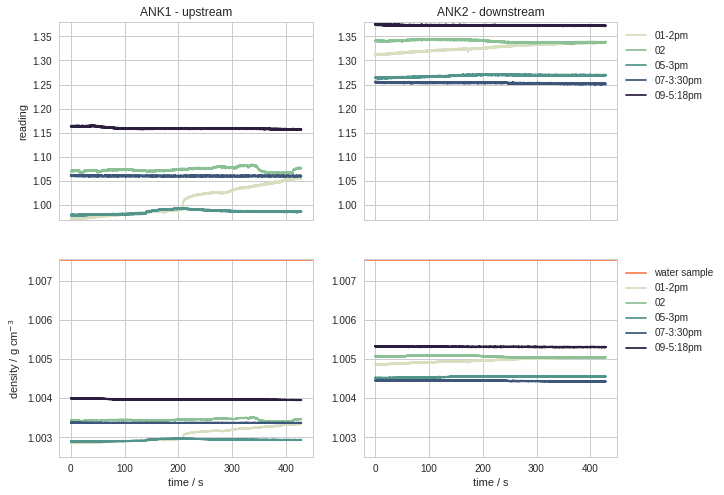

In [17]:
fig, ((ax0,ax1),(ax2,ax3)) = plt.subplots(2,2, figsize=(10,8), sharex=True)

rho0=1.007536
ax2.axhline(rho0, color='coral', label='water sample')
ax3.axhline(rho0, color='coral', label='water sample')
labels = ['01-2pm','02','05-3pm','07-3:30pm','09-5:18pm'] 
   
filepaths = ['../probe_characterization_17jul19/01_ANKs.mat',
             '../probe_characterization_17jul19/02_ANKs.mat',
             '../probe_characterization_17jul19/05_ANKs3.mat',
             '../probe_characterization_17jul19/07_ANKs4.mat',
             '../probe_characterization_17jul19/09_ANKs5.mat',
             ]

sns.set_palette(sns.cubehelix_palette(len(filepaths), start=.5, rot=-.75))
for filepath, lab in zip(filepaths, labels):
    mat = sio.loadmat(filepath, squeeze_me=True)
    P1 = mat['ch1']
    P2 = mat['ch2']
    D1 = ctools.densANK1_12Jul19(P1)
    D2 = ctools.densANK2_12Jul19(P2)
    time = mat['time']
    ax0.plot(time,P1, label=lab)
    ax1.plot(time,P2, label=lab)
    ax2.plot(time,D1, label=lab)
    ax3.plot(time,D2, label=lab)
    
ax1.legend(bbox_to_anchor=(1,1))
ax3.legend(bbox_to_anchor=(1,1))

ax0.set_ylabel('reading')#'density / g cm$^{-3}$')
ax2.set_ylabel('density / g cm$^{-3}$')
ax0.set_title('ANK1 - upstream')
ax1.set_title('ANK2 - downstream')
ax2.set_xlabel('time / s')
ax3.set_xlabel('time / s')
ax0.set_ylim(0.970,1.38)
ax1.set_ylim(0.970,1.38)
ax2.set_ylim(1.0025,1.00755)
ax3.set_ylim(1.0025,1.00755)


### Slushing water


(1.0025, 1.00755)

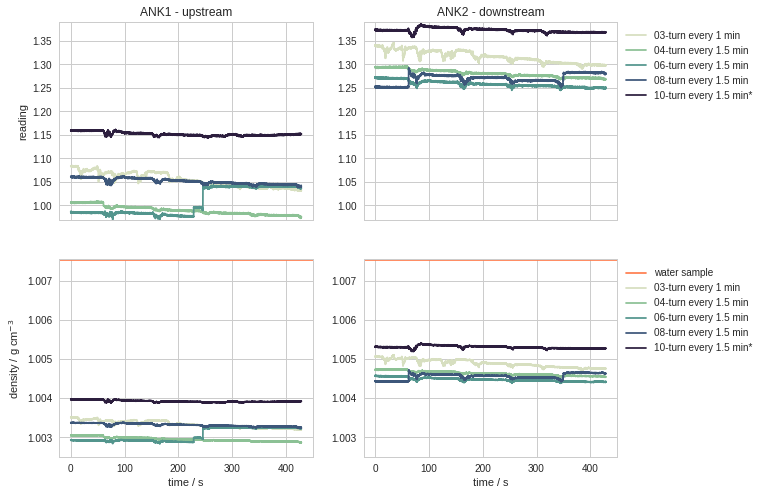

In [21]:
fig, ((ax0,ax1),(ax2,ax3)) = plt.subplots(2,2, figsize=(10,8), sharex=True)

rho0=1.007536
ax2.axhline(rho0, color='coral', label='water sample')
ax3.axhline(rho0, color='coral', label='water sample')
labels = ['03-turn every 1 min','04-turn every 1.5 min',
          '06-turn every 1.5 min','08-turn every 1.5 min','10-turn every 1.5 min*'] 
   
filepaths = ['../probe_characterization_17jul19/03_ANKs_slush.mat',
             '../probe_characterization_17jul19/04_ANKs_slush2.mat',
             '../probe_characterization_17jul19/06_ANKs_slush3.mat',
             '../probe_characterization_17jul19/08_ANKs_slush4.mat',
             '../probe_characterization_17jul19/10_ANKs_slush5.mat',
            ]

sns.set_palette(sns.cubehelix_palette(len(filepaths), start=.5, rot=-.75))
for filepath, lab in zip(filepaths, labels):
    mat = sio.loadmat(filepath, squeeze_me=True)
    P1 = mat['ch1']
    P2 = mat['ch2']
    D1 = ctools.densANK1_12Jul19(P1)
    D2 = ctools.densANK2_12Jul19(P2)
    time = mat['time']
    ax0.plot(time,P1, label=lab)
    ax1.plot(time,P2, label=lab)
    ax2.plot(time,D1, label=lab)
    ax3.plot(time,D2, label=lab)
    
ax1.legend(bbox_to_anchor=(1,1))
ax3.legend(bbox_to_anchor=(1,1))

ax0.set_ylabel('reading')#'density / g cm$^{-3}$')
ax2.set_ylabel('density / g cm$^{-3}$')
ax0.set_title('ANK1 - upstream')
ax1.set_title('ANK2 - downstream')
ax2.set_xlabel('time / s')
ax3.set_xlabel('time / s')
ax0.set_ylim(0.970,1.39)
ax1.set_ylim(0.970,1.39)
ax2.set_ylim(1.0025,1.00755)
ax3.set_ylim(1.0025,1.00755)


### Experiment with homogeneous watercolumn

6.599603013790478e-05
5.7935978998946425e-05
0.0002158974981631978
0.00013206995397951893
0.00014010976644418527
0.0001251279970635455
0.0002695314738603294
0.00011778467264034198
0.00035076956823454353
0.00013379275440539296
0.00022015096507055354
9.030828036449279e-05


(1.0093, 1.0109)

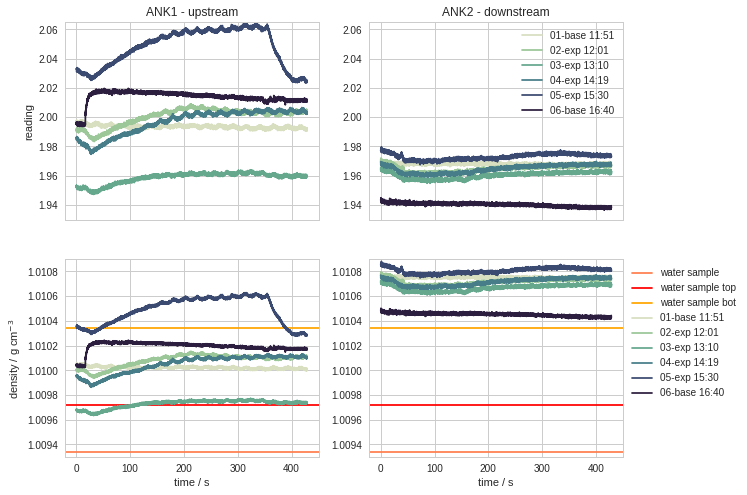

In [28]:
fig, ((ax0,ax1),(ax2,ax3)) = plt.subplots(2,2, figsize=(10,8), sharex=True)

rho0=1.00934
rho_top=1.00972
rho_bot=1.01034

ax2.axhline(rho0, color='coral', label='water sample')
ax3.axhline(rho0, color='coral', label='water sample')
ax2.axhline(rho_top, color='red', label='water sample top')
ax3.axhline(rho_top, color='red', label='water sample top')
ax2.axhline(rho_bot, color='orange', label='water sample bot')
ax3.axhline(rho_bot, color='orange', label='water sample bot')

labels = ['01-base 11:51','02-exp 12:01','03-exp 13:10','04-exp 14:19','05-exp 15:30','06-base 16:40'] 
   
filepaths = ['../probe_characterization_18jul19/01_base.mat',
             '../probe_characterization_18jul19/02_experiment1.mat',
             '../probe_characterization_18jul19/03_experiment2.mat',
             '../probe_characterization_18jul19/04_experiment3.mat',
             '../probe_characterization_18jul19/05_experiment4.mat',
             '../probe_characterization_18jul19/06_base.mat'
             ]

sns.set_palette(sns.cubehelix_palette(len(filepaths), start=.5, rot=-.75))
for filepath, lab in zip(filepaths, labels):
    mat = sio.loadmat(filepath, squeeze_me=True)
    P1 = mat['ch1']
    P2 = mat['ch2']
    D1 = ctools.densANK1_12Jul19(P1)
    D2 = ctools.densANK2_12Jul19(P2)
    time = mat['time']
    ax0.plot(time,P1, label=lab)
    ax1.plot(time,P2, label=lab)
    ax2.plot(time,D1, label=lab)
    ax3.plot(time,D2, label=lab)
    print(np.max(D1)-np.min(D1))
    print(np.max(D2)-np.min(D2))
ax1.legend(bbox_to_anchor=(1,1))
ax3.legend(bbox_to_anchor=(1,1))

ax0.set_ylabel('reading')#'density / g cm$^{-3}$')
ax2.set_ylabel('density / g cm$^{-3}$')
ax0.set_title('ANK1 - upstream')
ax1.set_title('ANK2 - downstream')
ax2.set_xlabel('time / s')
ax3.set_xlabel('time / s')
ax0.set_ylim(1.93,2.065)
ax1.set_ylim(1.93,2.065)
ax2.set_ylim(1.0093,1.0109)
ax3.set_ylim(1.0093,1.0109)


### Fresh water experiments